# Урок 20. Классификация. Прогнозирование оттока клиентов

Мы будем использовать логистическую регрессию для прогнозирования оттока.

## Датасет

* Ссылка на kaggle: https://www.kaggle.com/blastchar/telco-customer-churn
* Ссылка на файл (Google Drive): https://drive.google.com/file/d/1hJUbT6ujAjLuXGDkC3TI36t5b5SCkxUm/view?usp=sharing

## 1. Подготовка данных



* Скачайте данные и прочитайте их с помощью pandas.
* Ознакомьтесь с данными.
* Сделайте названия столбцов и значения однородными.
* Проверьте, были ли все столбцы прочитаны правильно.
* Проверьте, нужно ли подготовить переменную "churn" (переменную оттока).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_data = '/content/drive/MyDrive/AI_lesson/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path_to_data)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


* Customer ID - Идентификатор клиента

* gender - Пол клиента (мужской или женский)

* SeniorCitizen - Является ли клиент пожилым человеком или нет (1, 0)

* Partner - Есть ли у клиента партнер или нет (Да, Нет)

* Dependents - Есть ли у клиента иждивенцы или нет (Да, Нет)

* tenure - Количество месяцев, в течение которых клиент остается с компанией

* PhoneService - Есть ли у клиента телефонная служба или нет (Да, Нет)

* MultipleLines - Есть ли у клиента несколько линий или нет (Да, Нет, Нет телефонной службы)

* InternetService - Провайдер интернет-услуг клиента (DSL, Оптоволокно, Нет)

* OnlineSecurity - Есть ли у клиента онлайн-безопасность или нет (Да, Нет, Нет интернет-услуги)
- OnlineBackup: Наличие у клиента онлайн-резервного копирования (Да, Нет, Нет интернет-услуги)
- DeviceProtection: Наличие у клиента защиты устройства (Да, Нет, Нет интернет-услуги)
- TechSupport: Наличие у клиента технической поддержки (Да, Нет, Нет интернет-услуги)
- StreamingTV: Наличие у клиента стримингового телевидения (Да, Нет, Нет интернет-услуги)
- StreamingMovies: Наличие у клиента стримингового кинотеатра (Да, Нет, Нет интернет-услуги)
- Contract: Срок контракта клиента (Помесячно, Один год, Два года)
- PaperlessBilling: Наличие у клиента безбумажного биллинга (Да, Нет)
- PaymentMethod: Способ оплаты клиента (Электронный чек, Почтовый чек, Банковский перевод (автоматический), Кредитная карта (автоматический))
- MonthlyCharges: Сумма, взимаемая с клиента ежемесячно
- TotalCharges: Общая сумма, взимаемая с клиента
- Churn: Ушел клиент или нет (Да или Нет)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [ ]:
list(df.dtypes[df.dtypes == 'object'].index)

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [ ]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
pd.to_numeric(df['totalcharges'], errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [ ]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [ ]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [ ]:
df['totalcharges'] = df['totalcharges'].fillna(0)

In [ ]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [ ]:
(df.churn == 'yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [ ]:
df.churn = (df.churn == 'yes').astype(int)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df[df.churn == 1]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
5,9305-cdskc,female,0,no,no,8,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,99.65,820.50,1
8,7892-pookp,female,0,yes,no,28,yes,yes,fiber_optic,no,...,yes,yes,yes,yes,month-to-month,yes,electronic_check,104.80,3046.05,1
13,0280-xjgex,male,0,no,no,49,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-hpsbg,male,0,no,no,12,yes,no,dsl,no,...,no,yes,yes,no,one_year,yes,electronic_check,59.80,727.80,1
7026,8775-cebbj,female,0,no,no,9,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),44.20,403.35,1
7032,6894-lfhly,male,1,no,no,1,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,75.75,75.75,1
7034,0639-tsiqw,female,0,no,no,67,yes,yes,fiber_optic,yes,...,yes,no,yes,no,month-to-month,yes,credit_card_(automatic),102.95,6886.25,1


## 2. Train, test, valid split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df_train, df_test_and_valid = train_test_split(df, test_size=0.4, random_state=1)
print(len(df_train), len(df_test_and_valid))

4225 2818


In [ ]:
df_test, df_val = train_test_split(df_test_and_valid, test_size=0.5, random_state=11)
print(len(df_train), len(df_test), len(df_val))

4225 1409 1409


In [ ]:
df_test

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2545,0654-pqkdw,female,0,yes,yes,62,yes,no,dsl,yes,...,yes,yes,yes,no,one_year,yes,bank_transfer_(automatic),70.75,4263.45,0
4087,3847-baerp,female,0,no,no,10,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,20.90,247.00,0
3396,5578-nkcxi,female,0,yes,yes,58,yes,no,fiber_optic,yes,...,no,no,yes,yes,one_year,no,credit_card_(automatic),99.25,5846.65,0
6507,5708-evonk,female,0,yes,yes,58,yes,yes,fiber_optic,yes,...,no,no,no,yes,month-to-month,yes,bank_transfer_(automatic),93.40,5435.60,1
5830,6754-wkshp,male,0,no,yes,30,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,bank_transfer_(automatic),25.35,723.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,1240-knsez,male,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,20.10,20.10,1
1958,3737-xbqdd,male,0,no,no,24,yes,yes,fiber_optic,no,...,yes,no,no,no,month-to-month,yes,bank_transfer_(automatic),84.85,2048.80,0
5930,8398-tbiyd,female,0,no,no,72,yes,yes,fiber_optic,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),84.70,6185.15,0
3272,6772-ksatr,male,0,no,no,1,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,81.70,81.70,1


In [ ]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [ ]:
df_train.churn.values

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [ ]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5879-hmffh,female,0,yes,no,72,yes,yes,dsl,yes,yes,yes,yes,yes,yes,two_year,no,bank_transfer_(automatic),88.05,6520.80
1,8374-uulrv,male,0,no,no,72,yes,yes,dsl,yes,yes,no,yes,yes,yes,two_year,no,credit_card_(automatic),86.05,6309.65
2,9447-yptbx,female,0,yes,no,50,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,943.10
3,4797-axpxk,female,0,no,yes,1,yes,no,dsl,yes,yes,no,yes,no,no,month-to-month,yes,electronic_check,60.00,60.00
4,9402-orrah,female,1,no,no,15,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,91.50,1400.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60
4221,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90
4222,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50
4223,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10


In [ ]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## 3. EDA


* Проверить пропущенные значения
* Изучить целевую переменную (отток)
* Рассмотреть числовые и категориальные переменные

In [ ]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df.churn.value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [ ]:
df.churn.mean()

0.2653698707936959

In [ ]:
global_churn_rate = df.churn.mean()

In [ ]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [ ]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 4. Важность признаков: взаимная информация.

Анализ важности признаков (часть исследовательского анализа данных) - определение, какие признаки влияют на нашу целевую переменную

* Коэффициент оттока (churn rate)
* Коэффициент риска (risk ratio)

## Коэффициент оттока (churn rate)

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
churn_female = df[df.gender == 'female'].churn.mean()
churn_female

0.26920871559633025

In [ ]:
churn_male = df[df.gender == 'male'].churn.mean()
churn_male

0.2616033755274262

In [ ]:
global_churn = df.churn.mean()
global_churn

0.2653698707936959

In [ ]:
df.partner.value_counts()

partner
no     3641
yes    3402
Name: count, dtype: int64

In [ ]:
churn_partner = df[df.partner == 'yes'].churn.mean()
churn_partner

0.1966490299823633

In [ ]:
global_churn - churn_partner

0.06872084081133259

In [ ]:
churn_no_partner = df[df.partner == 'no'].churn.mean()
churn_no_partner

0.32957978577313923

In [ ]:
global_churn - churn_no_partner

-0.06420991497944334

## Коэффициент риска (risk ratio)

In [ ]:
churn_no_partner / global_churn

1.241963847619165

In [ ]:
churn_partner / global_churn

0.7410375164075894

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
from IPython.display import display

In [ ]:
for categorical_column in categorical:
    print(categorical_column)
    df_group = df.groupby(categorical_column).churn.agg(['mean', 'count'])
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,risk
gender,,,
female,0.269209,3488,1.014466
male,0.261603,3555,0.985807




seniorcitizen


,mean,count,risk
seniorcitizen,,,
0,0.236062,5901,0.889557
1,0.416813,1142,1.570686




partner


,mean,count,risk
partner,,,
no,0.329580,3641,1.241964
yes,0.196649,3402,0.741038




dependents


,mean,count,risk
dependents,,,
no,0.312791,4933,1.178700
yes,0.154502,2110,0.582215




phoneservice


,mean,count,risk
phoneservice,,,
no,0.249267,682,0.939319
yes,0.267096,6361,1.006506




multiplelines


,mean,count,risk
multiplelines,,,
no,0.250442,3390,0.943749
no_phone_service,0.249267,682,0.939319
yes,0.286099,2971,1.078114




internetservice


,mean,count,risk
internetservice,,,
dsl,0.189591,2421,0.714441
fiber_optic,0.418928,3096,1.578656
no,0.074050,1526,0.279044




onlinesecurity


,mean,count,risk
onlinesecurity,,,
no,0.417667,3498,1.573906
no_internet_service,0.074050,1526,0.279044
yes,0.146112,2019,0.550597




onlinebackup


,mean,count,risk
onlinebackup,,,
no,0.399288,3088,1.504645
no_internet_service,0.074050,1526,0.279044
yes,0.215315,2429,0.811377




deviceprotection


,mean,count,risk
deviceprotection,,,
no,0.391276,3095,1.474456
no_internet_service,0.074050,1526,0.279044
yes,0.225021,2422,0.847951




techsupport


,mean,count,risk
techsupport,,,
no,0.416355,3473,1.568960
no_internet_service,0.074050,1526,0.279044
yes,0.151663,2044,0.571517




streamingtv


,mean,count,risk
streamingtv,,,
no,0.335231,2810,1.263261
no_internet_service,0.074050,1526,0.279044
yes,0.300702,2707,1.133143




streamingmovies


,mean,count,risk
streamingmovies,,,
no,0.336804,2785,1.269188
no_internet_service,0.074050,1526,0.279044
yes,0.299414,2732,1.128291




contract


,mean,count,risk
contract,,,
month-to-month,0.427097,3875,1.609440
one_year,0.112695,1473,0.424672
two_year,0.028319,1695,0.106714




paperlessbilling


,mean,count,risk
paperlessbilling,,,
no,0.163301,2872,0.615371
yes,0.335651,4171,1.264842




paymentmethod


,mean,count,risk
paymentmethod,,,
bank_transfer_(automatic),0.167098,1544,0.629681
credit_card_(automatic),0.152431,1522,0.574410
electronic_check,0.452854,2365,1.706502
mailed_check,0.191067,1612,0.720003


# Урок 21. Классификация. Прогнозирование оттока клиентов

## 5.1 Важность признаков: Взаимная информация.


**Взаимная информация** (Mutual Information, MI) — это статистическая мера, которая оценивает, сколько информации об одной случайной величине можно получить, наблюдая за другой случайной величиной.

В контексте машинного обучения, взаимная информация часто используется для определения, какие признаки являются наиболее полезными для предсказания определенного целевого значения. Если взаимная информация между признаком и целевым значением высока, это означает, что зная значение этого признака, мы получаем много информации о целевом значении.

[Mutual Information](https://habr.com/ru/articles/687546/)


In [ ]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df.contract, df.churn)

0.09845305342598942

In [ ]:
mutual_info_score(df.multiplelines, df.churn)

0.0008012658524292199

In [ ]:
def calculate_mi(series):
    return mutual_info_score(series, df.churn)

In [ ]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
df[categorical].apply(calculate_mi).sort_values(ascending=False)

contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
seniorcitizen       0.010577
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

## 5.2 Важность признаков: корреляция.




*   `0.0 - 0.2` - слабая корреляция
*   `0.2 - 0.5` - умеренная корреляция
*   `0.5 - 1.0` - сильная корреляция



In [ ]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
import seaborn as sns

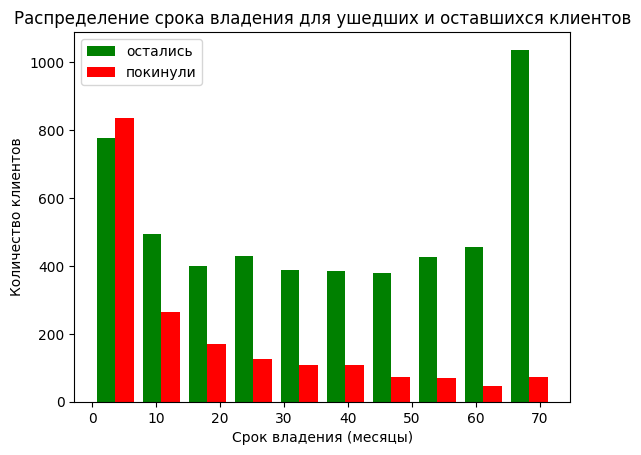

In [ ]:
churn_tenure_yes = df[df.churn == 1].tenure
churn_tenure_no = df[df.churn == 0].tenure

plt.hist([churn_tenure_no, churn_tenure_yes], color=['green','red'], label=['остались', 'покинули'])
plt.title('Распределение срока владения для ушедших и оставшихся клиентов')
plt.xlabel('Срок владения (месяцы)')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

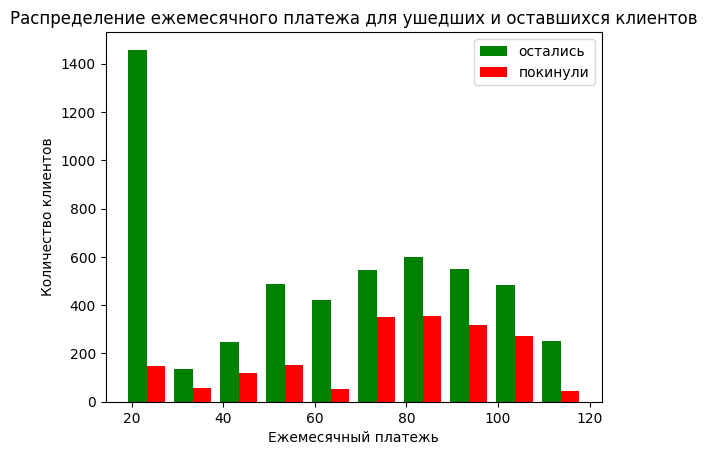

In [ ]:
churn_monthlycharges_yes = df[df.churn == 1].monthlycharges
churn_monthlycharges_no = df[df.churn == 0].monthlycharges

plt.hist([churn_monthlycharges_no, churn_monthlycharges_yes], color=['green','red'], label=['остались', 'покинули'])
plt.title('Распределение ежемесячного платежа для ушедших и оставшихся клиентов')
plt.xlabel('Ежемесячный платежь')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

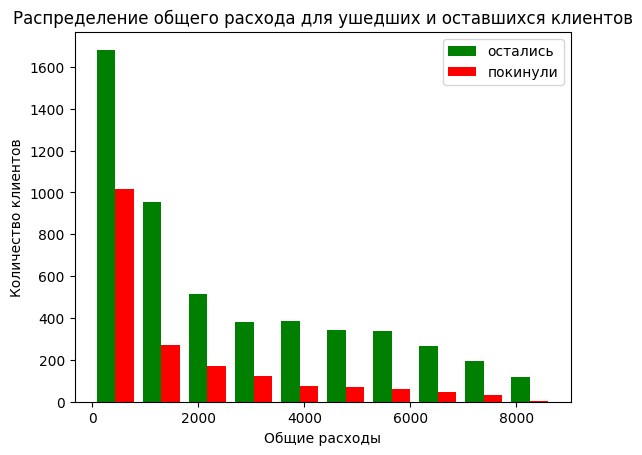

In [ ]:
churn_totalcharges_yes = df[df.churn == 1].totalcharges
churn_totalcharges_no = df[df.churn == 0].totalcharges

plt.hist([churn_totalcharges_no, churn_totalcharges_yes], color=['green','red'], label=['остались', 'покинули'])
plt.title('Распределение общего расхода для ушедших и оставшихся клиентов')
plt.xlabel('Общие расходы')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

## 6. One-hot encoding


`One-hot encoding` - это процесс преобразования категориальных данных в формат, который можно предоставить алгоритмам машинного обучения для улучшения предсказательной точности.

В one-hot encoding каждое уникальное значение категориального поля превращается в новый столбец в данных и присваивается бинарное значение — `1` или `0`.

One-hot encoding — это способ преобразования категориальных данных (таких как слова или метки) в числовой формат, который можно использовать для обучения машинных моделей. В основе метода лежит создание новых столбцов для каждой уникальной категории в исходном столбце. Каждый из этих новых столбцов соответствует одной категории и содержит 1 (если в данной строке была эта категория) или 0 (если не была).


In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
df_train.head().T

,0,1,2,3,4
customerid,5879-hmffh,8374-uulrv,9447-yptbx,4797-axpxk,9402-orrah
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,1
partner,yes,no,yes,no,no
dependents,no,no,no,yes,no
tenure,72,72,50,1,15
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,no,no,no
internetservice,dsl,dsl,no,dsl,fiber_optic
onlinesecurity,yes,yes,no_internet_service,yes,no


In [ ]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5879-hmffh,female,0,yes,no,72,yes,yes,dsl,yes,yes,yes,yes,yes,yes,two_year,no,bank_transfer_(automatic),88.05,6520.80
1,8374-uulrv,male,0,no,no,72,yes,yes,dsl,yes,yes,no,yes,yes,yes,two_year,no,credit_card_(automatic),86.05,6309.65
2,9447-yptbx,female,0,yes,no,50,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,943.10
3,4797-axpxk,female,0,no,yes,1,yes,no,dsl,yes,yes,no,yes,no,no,month-to-month,yes,electronic_check,60.00,60.00
4,9402-orrah,female,1,no,no,15,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,91.50,1400.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60
4221,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90
4222,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50
4223,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10


In [ ]:
categorical + numerical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'tenure',
 'monthlycharges',
 'totalcharges']

In [ ]:
#формируем датафрейм который содержит только категориальные и числовые признаки
#Преобразуем датафрейм в список словарей
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]
#первый словар - первая строка, ключ - имя стобца, значения - значения внутри столбцов

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 72,
 'monthlycharges': 88.05,
 'totalcharges': 6520.8}

In [ ]:
dv = DictVectorizer(sparse = False)
#DictVectorizer - это инструмент из библиотеки scikit-learn, который преобразует словари в матрицы признаков.
#Опция sparse=False указывает, что результат будет плотной матрицей, а не разреженной.

In [ ]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 72,
 'monthlycharges': 88.05,
 'totalcharges': 6520.8}

In [ ]:
X_train = dv.fit_transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.8050e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.2000e+01, 6.5208e+03])

In [ ]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224
customerid,5879-hmffh,8374-uulrv,9447-yptbx,4797-axpxk,9402-orrah,3669-lvwzb,4274-drsqt,9046-dqmtp,6425-jwtdv,3090-letty,...,5345-bmkwb,1131-qqzeb,3262-eidhv,7446-sfaoa,2250-ivbwa,0781-lkxbr,3507-gasnp,8868-wozgu,1251-krreg,5840-nvdcg
gender,female,male,female,female,female,male,female,male,male,male,...,male,male,female,female,male,male,male,male,male,female
seniorcitizen,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
partner,yes,no,yes,no,no,no,no,no,yes,no,...,yes,yes,yes,yes,yes,no,no,no,no,yes
dependents,no,no,no,yes,no,no,no,no,no,yes,...,no,no,yes,no,yes,no,yes,no,no,yes
tenure,72,72,50,1,15,5,66,35,48,2,...,8,71,72,37,64,9,60,28,2,16
phoneservice,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
multiplelines,yes,yes,no,no,no,no_phone_service,yes,no,no,yes,...,no,yes,yes,no,no,yes,no,yes,yes,no
internetservice,dsl,dsl,no,dsl,fiber_optic,dsl,fiber_optic,no,no,dsl,...,no,no,dsl,no,fiber_optic,fiber_optic,no,fiber_optic,dsl,dsl
onlinesecurity,yes,yes,no_internet_service,yes,no,no,no,no_internet_service,no_internet_service,yes,...,no_internet_service,no_internet_service,yes,no_internet_service,yes,no,no_internet_service,no,no,yes


In [ ]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.8050e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.2000e+01, 6.5208e+03])

In [ ]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224
customerid,5879-hmffh,8374-uulrv,9447-yptbx,4797-axpxk,9402-orrah,3669-lvwzb,4274-drsqt,9046-dqmtp,6425-jwtdv,3090-letty,...,5345-bmkwb,1131-qqzeb,3262-eidhv,7446-sfaoa,2250-ivbwa,0781-lkxbr,3507-gasnp,8868-wozgu,1251-krreg,5840-nvdcg
gender,female,male,female,female,female,male,female,male,male,male,...,male,male,female,female,male,male,male,male,male,female
seniorcitizen,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
partner,yes,no,yes,no,no,no,no,no,yes,no,...,yes,yes,yes,yes,yes,no,no,no,no,yes
dependents,no,no,no,yes,no,no,no,no,no,yes,...,no,no,yes,no,yes,no,yes,no,no,yes
tenure,72,72,50,1,15,5,66,35,48,2,...,8,71,72,37,64,9,60,28,2,16
phoneservice,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
multiplelines,yes,yes,no,no,no,no_phone_service,yes,no,no,yes,...,no,yes,yes,no,no,yes,no,yes,yes,no
internetservice,dsl,dsl,no,dsl,fiber_optic,dsl,fiber_optic,no,no,dsl,...,no,no,dsl,no,fiber_optic,fiber_optic,no,fiber_optic,dsl,dsl
onlinesecurity,yes,yes,no_internet_service,yes,no,no,no,no_internet_service,no_internet_service,yes,...,no_internet_service,no_internet_service,yes,no_internet_service,yes,no,no_internet_service,no,no,yes


In [ ]:
dv.get_feature_names_out()
#get_feature_names_out() - это метод DictVectorizer, который возвращает имена признаков после преобразования словарей в матрицу признаков.

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [ ]:
df_val.T

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
customerid,2252-nknsi,4632-paoyu,3933-dqpwx,7956-xqwgu,9061-tihda,9129-uxerg,8824-rwfxj,1309-bxvoq,7017-vfuly,3229-uswar,...,0637-ylety,5536-slhpm,4480-qqrhc,6901-gogzg,2862-pfnik,2974-gguxs,5424-rlqlc,8966-oiqhg,1729-vlazj,1565-rhdjd
gender,male,male,female,male,male,female,male,male,female,female,...,female,female,female,male,male,female,male,female,female,female
seniorcitizen,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
partner,no,yes,no,no,yes,no,yes,yes,yes,no,...,no,yes,no,no,no,yes,no,yes,no,no
dependents,yes,yes,no,no,no,no,yes,no,no,no,...,no,no,no,yes,yes,no,no,yes,yes,yes
tenure,52,22,50,27,13,18,3,21,2,34,...,16,55,8,60,1,36,10,22,10,4
phoneservice,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,no,yes,yes,yes,no,yes
multiplelines,yes,no,no_phone_service,no,yes,yes,no,yes,no,no,...,yes,yes,no,yes,no_phone_service,yes,no,no,no_phone_service,yes
internetservice,dsl,no,dsl,no,fiber_optic,fiber_optic,dsl,fiber_optic,no,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,dsl,fiber_optic,dsl,no,dsl,fiber_optic
onlinesecurity,yes,no_internet_service,no,no_internet_service,no,no,no,no,no_internet_service,yes,...,no,no,no,yes,no,no,no,no_internet_service,yes,no


In [ ]:
categorical+numerical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'tenure',
 'monthlycharges',
 'totalcharges']

In [ ]:
df_val.T

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
customerid,2252-nknsi,4632-paoyu,3933-dqpwx,7956-xqwgu,9061-tihda,9129-uxerg,8824-rwfxj,1309-bxvoq,7017-vfuly,3229-uswar,...,0637-ylety,5536-slhpm,4480-qqrhc,6901-gogzg,2862-pfnik,2974-gguxs,5424-rlqlc,8966-oiqhg,1729-vlazj,1565-rhdjd
gender,male,male,female,male,male,female,male,male,female,female,...,female,female,female,male,male,female,male,female,female,female
seniorcitizen,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
partner,no,yes,no,no,yes,no,yes,yes,yes,no,...,no,yes,no,no,no,yes,no,yes,no,no
dependents,yes,yes,no,no,no,no,yes,no,no,no,...,no,no,no,yes,yes,no,no,yes,yes,yes
tenure,52,22,50,27,13,18,3,21,2,34,...,16,55,8,60,1,36,10,22,10,4
phoneservice,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,no,yes,yes,yes,no,yes
multiplelines,yes,no,no_phone_service,no,yes,yes,no,yes,no,no,...,yes,yes,no,yes,no_phone_service,yes,no,no,no_phone_service,yes
internetservice,dsl,no,dsl,no,fiber_optic,fiber_optic,dsl,fiber_optic,no,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,dsl,fiber_optic,dsl,no,dsl,fiber_optic
onlinesecurity,yes,no_internet_service,no,no_internet_service,no,no,no,no,no_internet_service,yes,...,no,no,no,yes,no,no,no,no_internet_service,yes,no


In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
val_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 52,
 'monthlycharges': 85.15,
 'totalcharges': 4461.85}

In [ ]:
X_val = dv.transform(val_dict)

In [ ]:
X_val[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 8.51500e+01, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 5.20000e+01, 4.46185e+03])

In [ ]:
X_val.shape

(1409, 45)

## 7. Логистическая регрессия (Logistic regression)


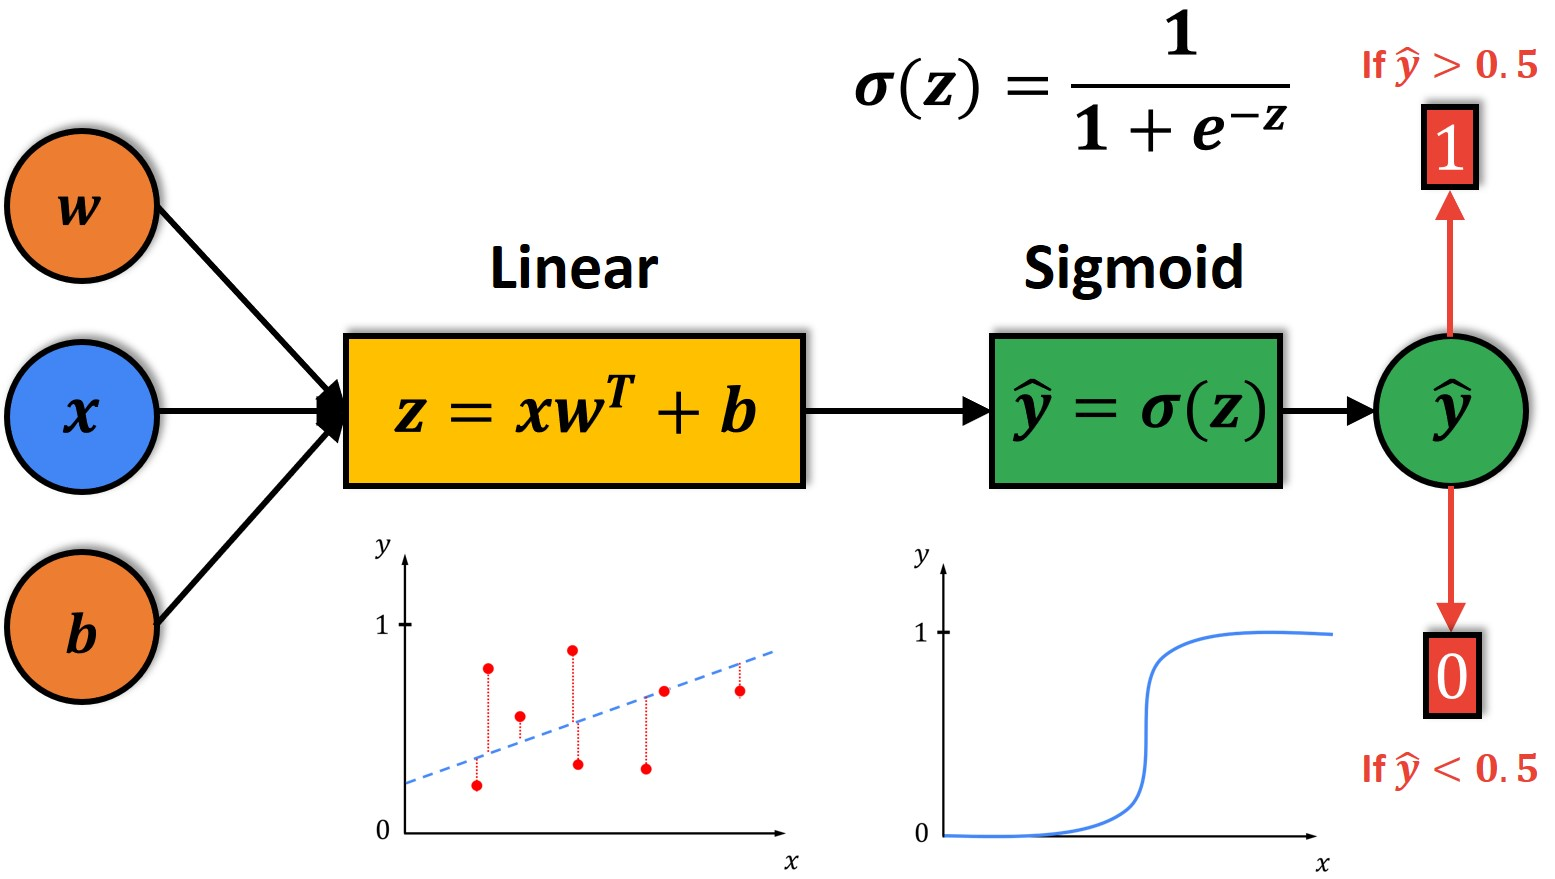

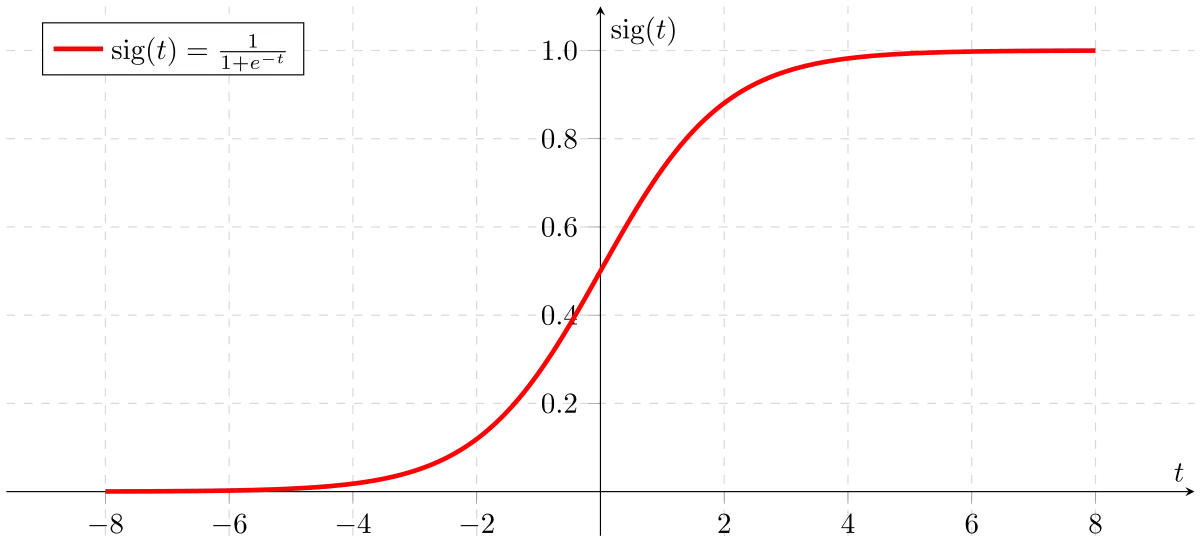

## 8. Обучение модели Логистической регрессии c Scikit-Learn


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 6.52080e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 6.30965e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+01, 9.43100e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
#Тренировка модели

LogisticRegression()

In [ ]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224
customerid,5879-hmffh,8374-uulrv,9447-yptbx,4797-axpxk,9402-orrah,3669-lvwzb,4274-drsqt,9046-dqmtp,6425-jwtdv,3090-letty,...,5345-bmkwb,1131-qqzeb,3262-eidhv,7446-sfaoa,2250-ivbwa,0781-lkxbr,3507-gasnp,8868-wozgu,1251-krreg,5840-nvdcg
gender,female,male,female,female,female,male,female,male,male,male,...,male,male,female,female,male,male,male,male,male,female
seniorcitizen,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
partner,yes,no,yes,no,no,no,no,no,yes,no,...,yes,yes,yes,yes,yes,no,no,no,no,yes
dependents,no,no,no,yes,no,no,no,no,no,yes,...,no,no,yes,no,yes,no,yes,no,no,yes
tenure,72,72,50,1,15,5,66,35,48,2,...,8,71,72,37,64,9,60,28,2,16
phoneservice,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
multiplelines,yes,yes,no,no,no,no_phone_service,yes,no,no,yes,...,no,yes,yes,no,no,yes,no,yes,yes,no
internetservice,dsl,dsl,no,dsl,fiber_optic,dsl,fiber_optic,no,no,dsl,...,no,no,dsl,no,fiber_optic,fiber_optic,no,fiber_optic,dsl,dsl
onlinesecurity,yes,yes,no_internet_service,yes,no,no,no,no_internet_service,no_internet_service,yes,...,no_internet_service,no_internet_service,yes,no_internet_service,yes,no,no_internet_service,no,no,yes


In [ ]:
model.coef_
#Веса для каждого признака
# w1, w2, ..., w45

array([[ 0.25253274, -0.14834767, -0.2215897 ,  0.05050996, -0.16791459,
         0.07904358, -0.08001147, -0.11643674, -0.06129815, -0.05610648,
        -0.29892787,  0.26153471, -0.08001147,  0.00302344, -0.21918743,
         0.02767987,  0.07410293,  0.05945489, -0.08001147, -0.09684805,
         0.23337893, -0.08001147, -0.27077209, -0.27882224,  0.16141761,
        -0.04934555, -0.06805908, -0.09965383, -0.09159975,  0.27692173,
        -0.20307278,  0.02767987, -0.1450845 ,  0.21317647, -0.0761529 ,
        -0.08001147,  0.03875974, -0.09582378, -0.08001147,  0.05843063,
         0.24572309, -0.08001147, -0.28311624, -0.06853807,  0.00037527]])

In [ ]:
model.intercept_
# w0 (bias)
#вытаскиваем смещение

array([-0.11783799])

In [ ]:
y_test
#Реальные значения, клиент ушел или остался

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
model.predict(X_train)
#Предсказание модели на тренировочных данных

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_val)[:,1]

array([0.0418458 , 0.03735005, 0.0174617 , ..., 0.04142212, 0.08142353,
       0.46684668])

In [ ]:
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred

array([0.0418458 , 0.03735005, 0.0174617 , ..., 0.04142212, 0.08142353,
       0.46684668])

In [ ]:
y_val_pred

array([0.0418458 , 0.03735005, 0.0174617 , ..., 0.04142212, 0.08142353,
       0.46684668])

In [ ]:
churn_descision = (y_val_pred >= 0.5)

In [ ]:
churn_descision

array([False, False, False, ..., False, False, False])

In [ ]:
df_val[churn_descision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
4,9061-tihda,male,1,yes,no,13,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,95.25,1233.65
5,9129-uxerg,female,1,no,no,18,yes,yes,fiber_optic,no,yes,no,yes,yes,yes,month-to-month,yes,credit_card_(automatic),103.60,1806.35
7,1309-bxvoq,male,0,yes,no,21,yes,yes,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,electronic_check,106.10,2249.95
12,7517-ldmps,female,0,no,no,12,yes,no,fiber_optic,no,yes,no,no,no,yes,month-to-month,yes,electronic_check,84.60,1017.35
15,4971-puyqo,female,0,no,no,27,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,mailed_check,94.55,2724.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,6331-ewieb,male,0,no,no,20,yes,yes,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,85.25,1734.50
1399,0637-ylety,female,0,no,no,16,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,credit_card_(automatic),95.60,1555.65
1401,4480-qqrhc,female,1,no,no,8,yes,no,fiber_optic,no,no,yes,no,no,no,month-to-month,yes,bank_transfer_(automatic),74.05,600.15
1403,2862-pfnik,male,0,no,yes,1,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,yes,electronic_check,24.70,24.70


In [ ]:
df_val

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,2252-nknsi,male,0,no,yes,52,yes,yes,dsl,yes,yes,no,yes,yes,yes,two_year,yes,mailed_check,85.15,4461.85
1,4632-paoyu,male,0,yes,yes,22,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,mailed_check,19.95,433.50
2,3933-dqpwx,female,0,no,no,50,no,no_phone_service,dsl,no,yes,yes,yes,no,no,two_year,no,credit_card_(automatic),39.70,1932.75
3,7956-xqwgu,male,0,no,no,27,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,credit_card_(automatic),19.40,460.25
4,9061-tihda,male,1,yes,no,13,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,95.25,1233.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2974-gguxs,female,1,yes,no,36,yes,yes,fiber_optic,no,yes,no,no,yes,no,month-to-month,yes,credit_card_(automatic),91.95,3301.05
1405,5424-rlqlc,male,0,no,no,10,yes,no,dsl,no,yes,no,no,yes,no,month-to-month,yes,mailed_check,59.65,638.95
1406,8966-oiqhg,female,0,yes,yes,22,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,bank_transfer_(automatic),20.75,452.35
1407,1729-vlazj,female,0,no,yes,10,no,no_phone_service,dsl,yes,yes,no,yes,no,no,one_year,no,mailed_check,40.25,411.45


In [ ]:
y_val

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
churn_descision

array([False, False, False, ..., False, False, False])

In [ ]:
y_val == churn_descision

array([ True,  True,  True, ...,  True,  True, False])

In [ ]:
(y_val == churn_descision).mean()

0.7970191625266146

In [ ]:
y_val_pred

array([0.0418458 , 0.03735005, 0.0174617 , ..., 0.04142212, 0.08142353,
       0.46684668])

In [ ]:
churn_descision.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_val

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred#предсказания по валидационному датасету
df_pred['prediction'] = churn_descision.astype(int)#предсказания в бинарном формате
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.041846,0,0
1,0.037350,0,0
2,0.017462,0,0
3,0.083636,0,0
4,0.814245,1,1
...,...,...,...
1404,0.505593,1,0
1405,0.390126,0,0
1406,0.041422,0,0
1407,0.081424,0,0


In [ ]:
(df_pred['prediction'] == df_pred['actual']).mean()

0.7970191625266146

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
accuracy = accuracy_score(df_pred['actual'], df_pred['prediction'])  # Вычисление точности модели: доля правильных ответов.
precision = precision_score(df_pred['actual'], df_pred['prediction'])  # Вычисление точности модели: доля верно предсказанных положительных классов относительно всех объектов, предсказанных как положительные.
recall = recall_score(df_pred['actual'], df_pred['prediction'])  # Вычисление полноты модели: доля корректно предсказанных положительных классов относительно всех реальных положительных объектов.
f1 = f1_score(df_pred['actual'], df_pred['prediction'])  # Вычисление F1-меры модели: гармоническое среднее между точностью и полнотой, показатель баланса между ними.

In [ ]:
model_name = 'Logistic Regression Base'
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

metrics_df = pd.concat([metrics_df ,pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
])], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base,0.797019,0.627063,0.523416,0.570571


<function matplotlib.pyplot.show(close=None, block=None)>

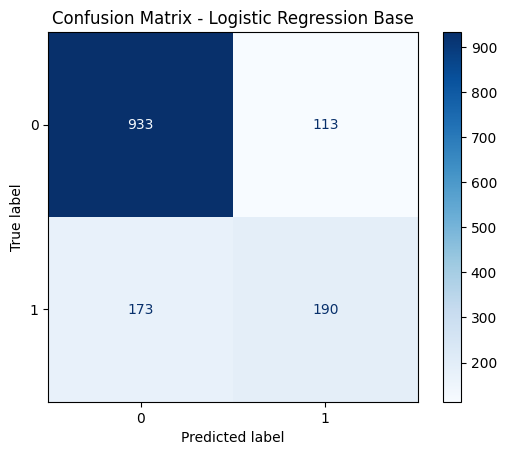

In [ ]:
conf_matrix = confusion_matrix(df_pred['actual'], df_pred['prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.show

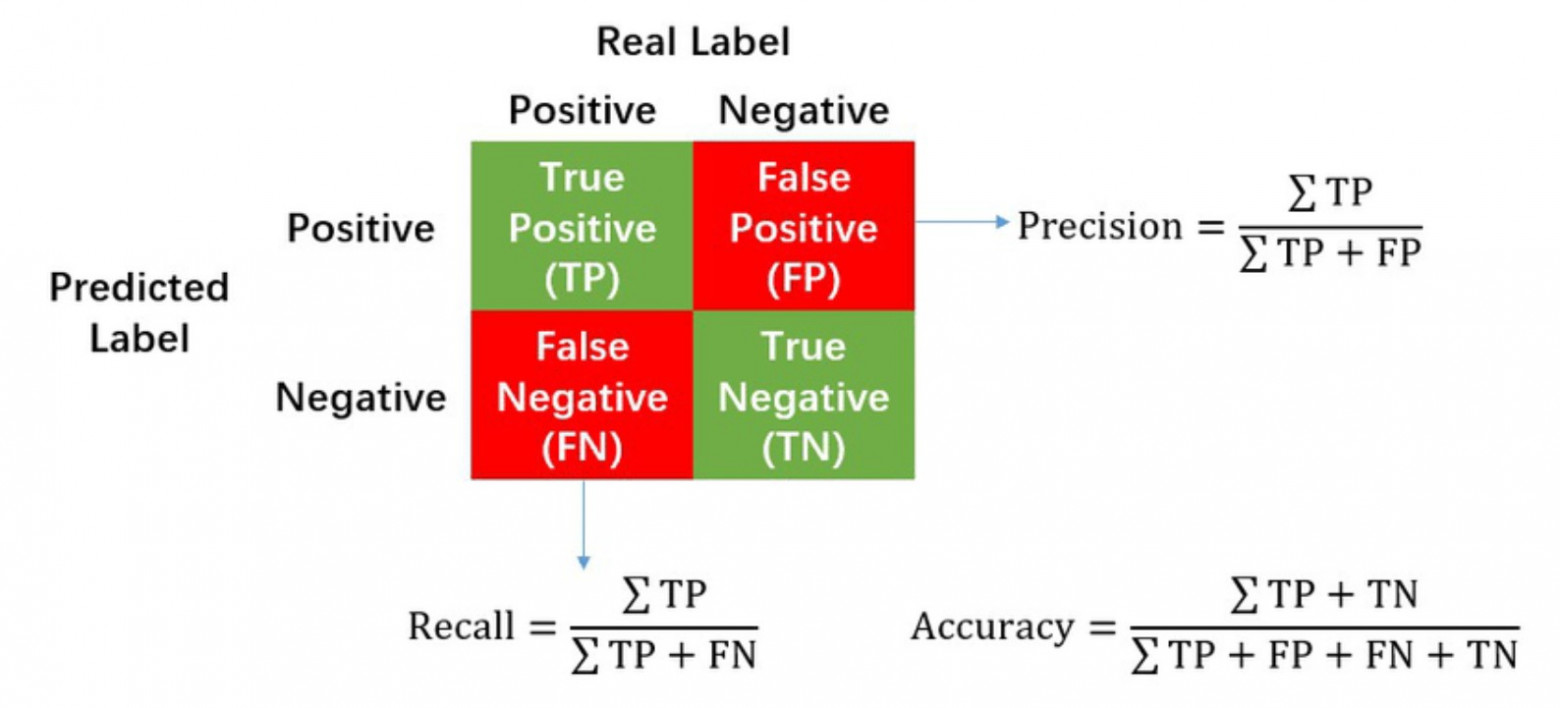

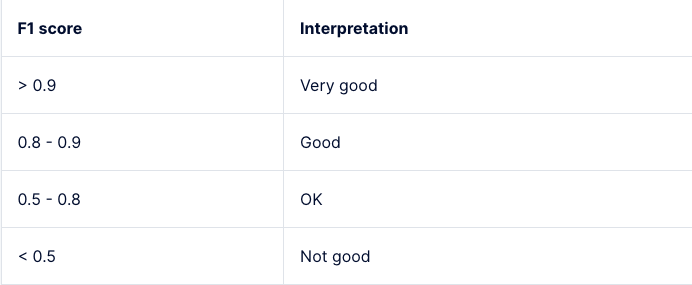

# Урок 22

## 9. Интерпретация модели


In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [ ]:
model.coef_
#Веса

array([[ 0.25253274, -0.14834767, -0.2215897 ,  0.05050996, -0.16791459,
         0.07904358, -0.08001147, -0.11643674, -0.06129815, -0.05610648,
        -0.29892787,  0.26153471, -0.08001147,  0.00302344, -0.21918743,
         0.02767987,  0.07410293,  0.05945489, -0.08001147, -0.09684805,
         0.23337893, -0.08001147, -0.27077209, -0.27882224,  0.16141761,
        -0.04934555, -0.06805908, -0.09965383, -0.09159975,  0.27692173,
        -0.20307278,  0.02767987, -0.1450845 ,  0.21317647, -0.0761529 ,
        -0.08001147,  0.03875974, -0.09582378, -0.08001147,  0.05843063,
         0.24572309, -0.08001147, -0.28311624, -0.06853807,  0.00037527]])

In [ ]:
model.intercept_[0]
#bias =w0

-0.11783799476624113

In [ ]:
model.coef_[0].round(3)

array([ 0.253, -0.148, -0.222,  0.051, -0.168,  0.079, -0.08 , -0.116,
       -0.061, -0.056, -0.299,  0.262, -0.08 ,  0.003, -0.219,  0.028,
        0.074,  0.059, -0.08 , -0.097,  0.233, -0.08 , -0.271, -0.279,
        0.161, -0.049, -0.068, -0.1  , -0.092,  0.277, -0.203,  0.028,
       -0.145,  0.213, -0.076, -0.08 ,  0.039, -0.096, -0.08 ,  0.058,
        0.246, -0.08 , -0.283, -0.069,  0.   ])

In [ ]:
a = [1, 2, 3, 4, 5]
b = [(6, 7), (8, 9),(11,12)]
dict(zip(a,b))

{1: (6, 7), 2: (8, 9), 3: (11, 12)}

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.253,
 'contract=one_year': -0.148,
 'contract=two_year': -0.222,
 'dependents=no': 0.051,
 'dependents=yes': -0.168,
 'deviceprotection=no': 0.079,
 'deviceprotection=no_internet_service': -0.08,
 'deviceprotection=yes': -0.116,
 'gender=female': -0.061,
 'gender=male': -0.056,
 'internetservice=dsl': -0.299,
 'internetservice=fiber_optic': 0.262,
 'internetservice=no': -0.08,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.219,
 'multiplelines=no_phone_service': 0.028,
 'multiplelines=yes': 0.074,
 'onlinebackup=no': 0.059,
 'onlinebackup=no_internet_service': -0.08,
 'onlinebackup=yes': -0.097,
 'onlinesecurity=no': 0.233,
 'onlinesecurity=no_internet_service': -0.08,
 'onlinesecurity=yes': -0.271,
 'paperlessbilling=no': -0.279,
 'paperlessbilling=yes': 0.161,
 'partner=no': -0.049,
 'partner=yes': -0.068,
 'paymentmethod=bank_transfer_(automatic)': -0.1,
 'paymentmethod=credit_card_(automatic)': -0.092,
 'paymentmethod=electronic_check': 0.277,
 'pay

In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5879-hmffh,female,0,yes,no,72,yes,yes,dsl,yes,yes,yes,yes,yes,yes,two_year,no,bank_transfer_(automatic),88.05,6520.80
1,8374-uulrv,male,0,no,no,72,yes,yes,dsl,yes,yes,no,yes,yes,yes,two_year,no,credit_card_(automatic),86.05,6309.65
2,9447-yptbx,female,0,yes,no,50,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,943.10
3,4797-axpxk,female,0,no,yes,1,yes,no,dsl,yes,yes,no,yes,no,no,month-to-month,yes,electronic_check,60.00,60.00
4,9402-orrah,female,1,no,no,15,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,91.50,1400.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60
4221,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90
4222,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50
4223,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10


In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 88.05},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 86.05},
 {'contract': 'one_year', 'tenure': 50, 'monthlycharges': 19.85},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 60.0},
 {'contract': 'month-to-month', 'tenure': 15, 'monthlycharges': 91.5},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 51.0},
 {'contract': 'one_year', 'tenure': 66, 'monthlycharges': 88.9},
 {'contract': 'month-to-month', 'tenure': 35, 'monthlycharges': 20.75},
 {'contract': 'two_year', 'tenure': 48, 'monthlycharges': 19.25},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 60.95}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dicts_train_small[0]

{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 88.05}

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)


In [ ]:
X_train_small

array([[  0.  ,   0.  ,   1.  ,  88.05,  72.  ],
       [  0.  ,   0.  ,   1.  ,  86.05,  72.  ],
       [  0.  ,   1.  ,   0.  ,  19.85,  50.  ],
       ...,
       [  1.  ,   0.  ,   0.  , 105.7 ,  28.  ],
       [  1.  ,   0.  ,   0.  ,  54.4 ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  68.25,  16.  ]])

In [ ]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

-2.544436327599184

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.013, -0.957,  0.029, -0.036])

In [ ]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.013,
 'contract=two_year': -0.957,
 'monthlycharges': 0.029,
 'tenure': -0.036}

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
sigmoid(-2.54)

0.0731011734223782

In [ ]:
-2.54 + 1*(-0.957) + 80*0.029 + 5*(-0.036)

-1.3569999999999995

In [ ]:
sigmoid(-0.25)

0.43782349911420193

In [ ]:
X_valid_small = dv_small.transform(dicts_val_small)

In [ ]:
y_val_pred_small = model_small.predict(X_valid_small)
y_val_pred_small

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy = accuracy_score(y_val, y_val_pred_small)
precision = precision_score(y_val, y_val_pred_small)
recall = recall_score(y_val, y_val_pred_small)
f1 = f1_score(y_val, y_val_pred_small)

model_name = 'Logistic Regression Base Small'

metrics_df = pd.concat([metrics_df ,pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
])], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base,0.797019,0.627063,0.523416,0.570571
1,Logistic Regression Base Small,0.777147,0.584192,0.468320,0.519878


## 10. Улучшение модели


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.churn.values

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
def split_data(df):
    df_train, df_test_and_valid = train_test_split(df, test_size=0.4, random_state=1)
    df_test, df_val = train_test_split(df_test_and_valid, test_size=0.5, random_state=11)
    y_train = df_train.churn.values
    y_test = df_test.churn.values
    y_val = df_val.churn.values
    del df_train['churn']
    del df_val['churn']
    del df_test['churn']
    return df_train, y_train, df_test, y_test, df_val, y_val

In [ ]:
def prepare_data(df_train, df_val, features):
    dicts_train_temp = df_train[features].to_dict(orient='records')
    dicts_val_temp = df_val[features].to_dict(orient='records')
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(dicts_train_temp)
    X_valid_temp = dv_temp.transform(dicts_val_temp)
    return X_train_temp, X_valid_temp

In [ ]:
def train_model(X_train, y_train):
    model_temp = LogisticRegression()
    model_temp.fit(X_train, y_train)
    return model_temp

In [ ]:
X_val

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        5.20000e+01, 4.46185e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.20000e+01, 4.33500e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        5.00000e+01, 1.93275e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.20000e+01, 4.52350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+01, 4.11450e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.00000e+00, 3.33550e+02]])

In [ ]:
def model_eval(model, model_name, X_val, y_val, treshold):
    y_pred = model.predict_proba(X_val)[:, 1]
    churn_descision = (y_pred >= treshold).astype(int)
    accuracy = accuracy_score(y_val, churn_descision)
    precision = precision_score(y_val, churn_descision)
    recall = recall_score(y_val, churn_descision)
    f1 = f1_score(y_val, churn_descision)
    res_df = pd.DataFrame([{'Model': model_name,'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1 Score': f1}])
    return res_df, churn_descision, y_pred

In [ ]:
X_train, X_valid = prepare_data(df_train, df_val, categorical + numerical)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'Test functions', X_valid, y_val, 0.5)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Base,0.797019,0.627063,0.523416,0.570571
1,Logistic Regression Base Small,0.777147,0.584192,0.468320,0.519878
2,Test functions,0.797019,0.627063,0.523416,0.570571


## 10.1 Поиск лучшего treshold

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from numpy import arange

In [ ]:
0,5
0,6>0.5=1
0.3<0.5=0

SyntaxError: cannot assign to literal (<ipython-input-298-3eace36791b3>, line 2)

In [ ]:
y_pred_proba

In [ ]:
y_val


In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)

scores = [f1_score(y_val, to_labels(y_pred_proba, t)) for t in thresholds]

ix = argmax(scores)
print(f'Best Treshold: {thresholds[ix]}, F1-Score {scores[ix]}')

In [ ]:
0.001
+0.001
0.002
0.003
...
0.999

In [ ]:
X_train_t281, X_valid_t281 = prepare_data(df_train, df_val, categorical + numerical)
model_t281 = train_model(X_train_t281, y_train)
res_model_df_t281, y_pred_class_t281, y_pred_proba_t281 = model_eval(model_t281,'Logistic Regression t=0.281', X_valid_t281, y_val, 0.281)
metrics_df = pd.concat([metrics_df , res_model_df_t281], ignore_index=True)
metrics_df

## 10.1. Feature Engineering

In [ ]:
df_train.columns

In [ ]:
df[categorical].apply(calculate_mi).sort_values(ascending=False)[:-3]

In [ ]:
columns_new = df[categorical].apply(calculate_mi).sort_values(ascending=False)[:-3].index

In [ ]:
feature_columns = list(df[categorical].apply(calculate_mi).sort_values(ascending=False)[:-3].index)

In [ ]:
feature_columns

In [ ]:
columns_new

In [ ]:
models_comp_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
X_train, X_valid = prepare_data(df_train, df_val, feature_columns)
model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model minus 3 feetures', X_valid, y_val, 0.281)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

## Min-max normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler,  StandardScaler, RobustScaler

In [ ]:
numerical

In [ ]:
df

In [ ]:
df_copy = df.copy()
df_copy

In [ ]:
df[numerical]

In [ ]:
(34-1/72-1)

In [ ]:
scaler = MinMaxScaler()
df_copy[numerical] = scaler.fit_transform(df_copy[numerical])

In [ ]:
df_copy[numerical]

In [ ]:
df['partner']

In [ ]:
le_enc_cols = ['gender', 'partner', 'dependents','paperlessbilling', 'phoneservice']
gender_map = {'male': 0, 'female': 1}
y_n_map = {'yes': 1, 'no': 0}

for col in le_enc_cols:
    if col == 'gender':
        df_copy[col] = df_copy[col].map(gender_map)
    else:
        df_copy[col] = df_copy[col].map(y_n_map)

In [ ]:
df_copy[le_enc_cols]

In [ ]:
df_train, y_train, df_test, y_test, df_val, y_val = split_data(df_copy)

In [ ]:
df_test

In [ ]:
feature_columns = categorical + numerical
X_train, X_valid = prepare_data(df_train, df_val, feature_columns)

model_new = train_model(X_train, y_train)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model Feature Eng t=0.281', X_valid, y_val, 0.281)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

In [ ]:
from sklearn import metrics, feature_selection,neighbors, model_selection, preprocessing, neighbors, linear_model, svm, ensemble

In [ ]:
y_val

In [ ]:
seed = 345
models = [
('k_nearest_neighbors', neighbors.KNeighborsClassifier()),
('logistic_regression', linear_model.LogisticRegression(random_state=seed)),
('support_vector_machines', svm.SVC(random_state=seed)),
('random_forest', ensemble.RandomForestClassifier(random_state=seed)),
('gradient_boosting', ensemble.GradientBoostingClassifier(random_state=seed)),]

def run_experiments(models, X_train=X_train, y_train=y_train, X_test=X_valid, y_test=y_val, seed=seed):
    results = dict()
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        f1_score = metrics.f1_score(y_test, predictions)
        print(f"{name} --> acc = {accuracy * 100}%, f1 = {f1_score}")
        results[name] = accuracy

results = run_experiments(models=models)

# Урок 23. Deployment

## Eval model on test set

In [ ]:
df

In [ ]:
X_train, X_test = prepare_data(df_train, df_test, feature_columns)
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model Feature Eng t=0.281 Test data', X_test, y_test, 0.281)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

## Train on df_train + df_val

In [ ]:
feature_columns = categorical + numerical
X_train, X_valid = prepare_data(pd.concat([df_train , df_test], ignore_index=True), df_val, feature_columns)

model_new = train_model(X_train, np.concatenate((y_train, y_test), axis=0))
res_model_df, y_pred_class, y_pred_proba = model_eval(model_new,'LR Model Feature Eng t=0.281 (train+test)', X_valid, y_val, 0.281)
metrics_df = pd.concat([metrics_df , res_model_df], ignore_index=True)
metrics_df

In [ ]:
def prepare_data(df_train, df_val, features):
    dicts_train_temp = df_train[features].to_dict(orient='records')
    dicts_val_temp = df_val[features].to_dict(orient='records')
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(dicts_train_temp)
    X_valid_temp = dv_temp.transform(dicts_val_temp)
    return X_train_temp, X_valid_temp, dv_temp

In [ ]:
X_train, X_valid, dv_model = prepare_data(pd.concat([df_train , df_test, df_val], ignore_index=True), df_val, feature_columns)
model_final = train_model(X_train, np.concatenate((y_train, y_test, y_val), axis=0))

## 11. Использование модели


## 11.1. Сохранить модель в файл

In [ ]:
model_final

LogisticRegression()

In [ ]:
import pickle

In [ ]:
model_file_path = '/content/sample_data/lr_model_churn_prediction.sav'
pickle.dump(model_final, open(model_file_path, 'wb'))

In [ ]:
encoding_model_file_path = '/content/sample_data/encoding_model.sav'
pickle.dump(dv_model, open(encoding_model_file_path, 'wb'))

## 11.2. Загрузка модели из файла

In [ ]:
loaded_model = pickle.load(open(model_file_path, 'rb'))
loaded_encoding_model = pickle.load(open(encoding_model_file_path, 'rb'))


## 11.3.  Функция для изпользования

In [ ]:
res_model_df, y_pred_class, y_pred_proba = model_eval(loaded_model,'LR Model from file', X_valid, y_val, 0.281)
res_model_df

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Model from file,0.748758,0.508021,0.785124,0.616883


In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender',
'seniorcitizen',
'partner',
'dependents',
'phoneservice',
'multiplelines',
'internetservice',
'onlinesecurity',
'onlinebackup',
'deviceprotection',
'techsupport',
'streamingtv',
'streamingmovies',
'contract',
'paperlessbilling',
'paymentmethod']
le_enc_cols = ['gender', 'partner', 'dependents','paperlessbilling', 'phoneservice']
gender_map = {'male': 0, 'female': 1}
y_n_map = {'yes': 1, 'no': 0}

def predict_churn(model, encoding_model, df_input, treshold):

    scaler = MinMaxScaler()

    df_original = df_input.copy()
    df_input[numerical] = scaler.fit_transform(df_input[numerical])

    for col in le_enc_cols:
        if col == 'gender':
            df_input[col] = df_input[col].map(gender_map)
        else:
            df_input[col] = df_input[col].map(y_n_map)

    dicts_df = df_input[categorical + numerical].to_dict(orient='records')
    X = encoding_model.transform(dicts_df)
    y_pred = model.predict_proba(X)[:, 1]
    churn_descision = (y_pred >= treshold).astype(int)
    df_original['churn_predicted'] = churn_descision
    df_original['churn_predicted_probability'] = y_pred

    return df_original


In [ ]:
df_new_input = df.loc[:100]

In [ ]:
df_input_new_churn=df_new_input.churn.values

In [ ]:
df_new_input = df_new_input.drop('churn', axis = 1)

In [ ]:
df_new_input

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9803-ftjcg,male,0,yes,yes,71,yes,yes,dsl,yes,yes,no,yes,no,no,one_year,yes,credit_card_(automatic),66.85,4748.70
97,0278-yxoog,male,0,no,no,5,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,21.05,113.85
98,3212-kxocr,male,0,no,no,52,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,bank_transfer_(automatic),21.00,1107.20
99,4598-xlknj,female,1,yes,no,25,yes,no,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,98.50,2514.50


In [ ]:
0.281<0.29

In [ ]:
res_temp = predict_churn(loaded_model, loaded_encoding_model, df_new_input, 0.281)
res_temp

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn_predicted,churn_predicted_probability
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,1,0.613617
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,no,no,no,one_year,no,mailed_check,56.95,1889.50,0,0.049783
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1,0.294461
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0,0.037149
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1,0.700166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9803-ftjcg,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,no,no,one_year,yes,credit_card_(automatic),66.85,4748.70,0,0.013874
97,0278-yxoog,male,0,no,no,5,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,21.05,113.85,0,0.168275
98,3212-kxocr,male,0,no,no,52,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,two_year,no,bank_transfer_(automatic),21.00,1107.20,0,0.006922
99,4598-xlknj,female,1,yes,no,25,yes,no,fiber_optic,no,...,no,yes,yes,month-to-month,yes,electronic_check,98.50,2514.50,1,0.662282


In [ ]:
accuracy = accuracy_score(df_input_new_churn, res_temp['churn_predicted'])
precision = precision_score(df_input_new_churn, res_temp['churn_predicted'])
recall = recall_score(df_input_new_churn, res_temp['churn_predicted'])
f1 = f1_score(df_input_new_churn, res_temp['churn_predicted'])
res_df = pd.DataFrame([{'Model': 'Test2','Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1 Score': f1}])
res_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Test2,0.772277,0.512195,0.875,0.646154


## 12. Итоги
